In [13]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm
import multiprocessing as mp

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
backend = Aer.get_backend('qasm_simulator')

def parallel(args):
    model = args[0]
    x = args[1]
    y = args[2]
    verbose = args[3]
    seed = args[4]
    np.random.seed(seed)
    
    model.train(x, y, epochs=100, verbose = verbose)
    
    return model

In [15]:
backend_santiago = pickle.load(open("backend_santiago", "rb"))

# Trainability, Ideal

## 1D, Gaussian Function

### Generate Data

In [16]:
n = 100
x, y = generate_1D_mixed_gaussian()

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_qnn = np.hstack([x_qcn, x_qcn, x_qcn])
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(100, 1)


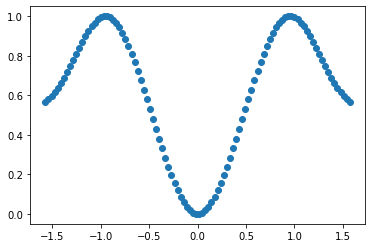

In [17]:
plt.plot(x_qcn, y, 'o')
plt.show()

### Training Models

### QNN

In [18]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(n_qubits = [4],
                         dim = [3,1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=5),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend_santiago,
                         shots = 1024)
    
    qnn_list.append([qnn, x_qnn, y, False, 42 + i])

    
qnn_list[0][3] = True

with mp.Pool(10) as p:
    qnn_list = p.map(parallel, qnn_list) 
    
    
saver(qnn_list, data_path("trainability_qnn_1D_noisy"))

epoch: 0, loss: 0.1250108875208522
epoch: 1, loss: 0.11418874077248779
epoch: 2, loss: 0.10579220874363993
epoch: 3, loss: 0.09835602233383221
epoch: 4, loss: 0.09267529398884239
epoch: 5, loss: 0.08538963658356825
epoch: 6, loss: 0.08007576327249477
epoch: 7, loss: 0.079299683729087
epoch: 8, loss: 0.08060911119238794
epoch: 9, loss: 0.07171116766535544
epoch: 10, loss: 0.07091830916144404
epoch: 11, loss: 0.06860147438427734
epoch: 12, loss: 0.07299916565928583
epoch: 13, loss: 0.073372372381899
epoch: 14, loss: 0.06970504110146797
epoch: 15, loss: 0.07009587030451053
epoch: 16, loss: 0.06807364730222554
epoch: 17, loss: 0.06955677872704787
epoch: 18, loss: 0.06889644909592821
epoch: 19, loss: 0.06702779316398769
epoch: 20, loss: 0.06902778011165417
epoch: 21, loss: 0.06788485968956408
epoch: 22, loss: 0.0684743200754863
epoch: 23, loss: 0.06882437575281837
epoch: 24, loss: 0.06739807170629245
epoch: 25, loss: 0.06458535690861122
epoch: 26, loss: 0.06758638910645058
epoch: 27, loss: 

### QCN

In [7]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots = 1024)
    
    qcn_list.append([qcn, x_qcn, y, False, 42 + i])

    
qcn_list[0][3] = True

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_1_noisy"))

epoch: 0, loss: 0.13782207310031894
epoch: 1, loss: 0.12082813943569562
epoch: 2, loss: 0.11319703495806706
epoch: 3, loss: 0.10431275842392589
epoch: 4, loss: 0.09879752203290255
epoch: 5, loss: 0.08643947659328453
epoch: 6, loss: 0.0738450300917962
epoch: 7, loss: 0.06140143395760164
epoch: 8, loss: 0.051247305430959844
epoch: 9, loss: 0.04852302304843979
epoch: 10, loss: 0.04412173447191851
epoch: 11, loss: 0.03911248681394623
epoch: 12, loss: 0.03657841147341408
epoch: 13, loss: 0.034990440362007345
epoch: 14, loss: 0.030513398168545515
epoch: 15, loss: 0.026355867379136564
epoch: 16, loss: 0.02203043299792694
epoch: 17, loss: 0.02144178522249634
epoch: 18, loss: 0.020126110713316495
epoch: 19, loss: 0.02028877300728014
epoch: 20, loss: 0.019519681936064737
epoch: 21, loss: 0.01763435737095374
epoch: 22, loss: 0.01796364711781339
epoch: 23, loss: 0.016071515812282427
epoch: 24, loss: 0.014534456203442833
epoch: 25, loss: 0.01387192740748806
epoch: 26, loss: 0.013829977823685342
epo

In [7]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots=1024)
    
    qcn_list.append([qcn, x_qcn, y, False, 42 + i])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)     
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_2_noisy"))

epoch: 0, loss: 0.1593583265595664
epoch: 1, loss: 0.08846082761067726
epoch: 2, loss: 0.08847660208377212
epoch: 3, loss: 0.0798060818086736
epoch: 4, loss: 0.058430023534644555


KeyboardInterrupt: 

## 2D function

### Generate Data

In [19]:
np.random.seed(42)

n = 12
x, y = generate_2D_mixed_gaussian()
x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_qnn = np.hstack([x_qcn, x_qcn[:,0:1]])
x_dnn = scaler(x, mode="standard")

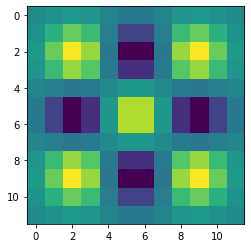

In [20]:
plt.imshow(y.reshape(n,n))
plt.show()

### Training Models

### QNN

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(n_qubits = [4],
                         dim = [3,1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=10),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots=1024)
    
    qnn_list.append([qnn, x_qnn, y, False, 42 + i])

    
qnn_list[0][3] = True

with mp.Pool(10) as p:
    qnn_list = p.map(parallel, qnn_list) 
    
    
saver(qnn_list, data_path("trainability_qnn_2D_noisy"))

epoch: 0, loss: 0.05777732523959974
epoch: 1, loss: 0.04909658908121595
epoch: 2, loss: 0.047891614270907976
epoch: 3, loss: 0.04322710223180416
epoch: 4, loss: 0.04233272851411164
epoch: 5, loss: 0.04135988753965448
epoch: 6, loss: 0.04408967088698249
epoch: 7, loss: 0.04214160562540736
epoch: 8, loss: 0.041721544752526554
epoch: 9, loss: 0.04031522101502592
epoch: 10, loss: 0.04044076571424692
epoch: 11, loss: 0.04118954673621841
epoch: 12, loss: 0.040844065684088555
epoch: 13, loss: 0.0404410801047117
epoch: 14, loss: 0.03961719447107835
epoch: 15, loss: 0.04224788888963492
epoch: 16, loss: 0.04005397334177991
epoch: 17, loss: 0.04175337418430271
epoch: 18, loss: 0.041042229163429395
epoch: 19, loss: 0.03907600493918278
epoch: 20, loss: 0.04111054046576898
epoch: 21, loss: 0.03939753064463653
epoch: 22, loss: 0.04037866043499897
epoch: 23, loss: 0.04177211191251313
epoch: 24, loss: 0.040186990209926284
epoch: 25, loss: 0.03986312402239983
epoch: 26, loss: 0.04029832903555655
epoch: 

### QCN

In [7]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4, 4],
                         dim = [2, 4, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots=1024)
    qcn_list.append([qcn, x_qcn, y, False, 42 + i])
    
qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)

saver(qcn_list, data_path("trainability_qcn_2D_reps_1_noisy"))

KeyboardInterrupt: 

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4, 4],
                         dim = [2, 4, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots=1024)
   
    qcn_list.append([qcn, x_qcn, y, False, 42 + i])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   
    
saver(qcn_list, data_path("trainability_qcn_2D_reps_2_noisy"))

In [ ]:
qcn_list = loader(data_path("trainability_qcn_2D_reps_2_noisy"))
qcn_list = [[qcn, x_qcn, y, False] for qcn in qcn_list]
qcn_list[0][3] = True  

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   
    
saver(qcn_list, data_path("trainability_qcn_2D_reps_2_noisy_2"))

In [ ]:
qcn_list = loader(data_path("trainability_qcn_2D_reps_2_noisy_2"))
qcn_list = [[qcn, x_qcn, y, False] for qcn in qcn_list]
qcn_list[0][3] = True  

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   
    
saver(qcn_list, data_path("trainability_qcn_2D_reps_2_noisy_3"))

In [ ]:
qcn_list = loader(data_path("trainability_qcn_2D_reps_2_noisy_3"))
qcn_list = [[qcn, x_qcn, y, False] for qcn in qcn_list]
qcn_list[0][3] = True  

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   
    
saver(qcn_list, data_path("trainability_qcn_2D_reps_2_noisy_4"))